# Introduction to neural networks

Max Joseph

<span style="color:blue">maxwell.b.joseph@colorado.edu</span>

Data scientist

Earth Lab Analytics Hub, CU Boulder

https://github.com/mbjoseph/intro-neural-nets-sklearn

![](https://earthdatascience.org/images/earth_sm.png)

# General use case

Predict $y$ given input $X$

$y = f(X)$, with $f$ unknown

# Labeling entire images

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Spielendes_K%C3%A4tzchen.JPG/1280px-Spielendes_K%C3%A4tzchen.JPG)

# Image segmentation

![](http://brainiac2.mit.edu/isbi_challenge/sites/default/files/Challenge-ISBI-2012-sample-image.png)

# Object detection

![](http://cvrs.whu.edu.cn/uploadfile/2015/0214/20150214085822572.jpg)

# Pose estimation

![](http://www.stat.ucla.edu/~xianjie.chen/projects/pose_estimation/figs/leeds_flic_examples.png)

# Depth estimation

![](https://camo.githubusercontent.com/eaee1af707b9ad2b2ac3b5be87de82fc590800d2/687474703a2f2f63616d7061722e696e2e74756d2e64652f66696c65732f7275707072656368742f6465707468707265642f696d616765732e6a7067)

# Automated face swapping

![](https://pbs.twimg.com/media/Cygif7UWgAAAD-V.jpg)

# Today: the multilayer perceptron

![](fig/bishop-5-1.png)

# Input variables $x_1, x_2, ..., x_D$

aka

- features
- explanatory variables
- covariates


# Mapping input variables to a hidden layer activation

$$a_j = \color{red}{\sum_{i = 1}^D w_{ji}^{(1)} x_i} + \color{blue} {w_{j0}^{(1)}}$$

activations for hidden units $j=1, ..., M$ in the first hidden layer $(1)$

# Activation of the $j^{th}$ hidden unit

$$a_j = \color{red}{\sum_{i = 1}^D w_{ji}^{(1)} x_i} + \color{blue} {w_{j0}^{(1)}}$$

### Response of hidden unit $j$ to input $i$: $\color{red}{w_{ji}^{(1)} x_i}$


# Activation of the $j^{th}$ hidden unit

$$a_j = \color{red}{\sum_{i = 1}^D w_{ji}^{(1)} x_i} + \color{blue} {w_{j0}^{(1)}}$$

### Response of hidden unit $j$ to input $i$: $\color{red}{w_{ji}^{(1)} x_i}$

### Total effect of inputs on hidden unit $j$: $\color{red}{\sum_{i = 1}^D w_{ji}^{(1)} x_i}$


# Activation of the $j^{th}$ hidden unit

$$a_j = \color{red}{\sum_{i = 1}^D w_{ji}^{(1)} x_i} + \color{blue} {w_{j0}^{(1)}}$$

### Response of hidden unit $j$ to input $i$: $\color{red}{w_{ji}^{(1)} x_i}$

### Total effect of inputs on hidden unit $j$: $\color{red}{\sum_{i = 1}^D w_{ji}^{(1)} x_i}$

### Bias parameter: $\color{blue} {w_{j0}^{(1)}}$


# Nonlinear activation function $h(.)$

$$z_j = h(a_j)$$

for $j = 1, ..., M$

Allows for complex, non-linear combinations of the inputs

# Activation functions

Must be **differentiable** and **nonlinear**

e.g., 

## Rectified linear unit (ReLU)

$h(a) =  a$ for $a > 0$, 
otherwise $h(a)=0$

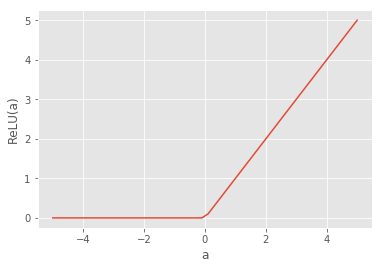

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def relu(x):
    return np.where(x > 0, x, 0)

x = np.linspace(-5, 5)
plt.plot(x, relu(x))
plt.xlabel("a")
plt.ylabel("ReLU(a)")
plt.show()

# Hyperbolic tangent

$$h(a) = tanh(a)$$

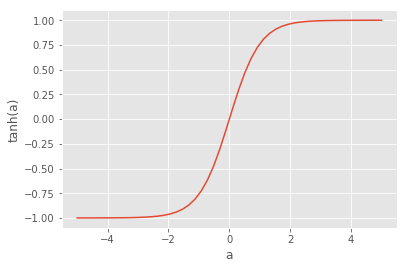

In [5]:
plt.plot(x, np.tanh(x))
plt.xlabel("a")
plt.ylabel("tanh(a)")
plt.show()

# We have our hidden layer, now what? 

$z_j = h(\sum_{i = 1}^D w_{ji}^{(1)} x_i + w_{j0}^{(1)})$

![](fig/bishop-5-1.png)

# From hidden layer to output activation

We need a way to map $z$ to a prediction

Activations of output unit $k = 1, ..., K$:

$$a_k = \sum_{j = 1}^{M} w_{kj}^{(2)} z_j + w_{k0}^{(2)}$$


# Computing outputs from output activations


### $a_k \rightarrow$ network outputs: $y_k = g(a_k)$

where $g(a)$ is an activation function

# Output activation functions

## Regression

$y$ is unbounded

$\rightarrow$ $g(a)$ is the identity function

$$g(a) = a$$

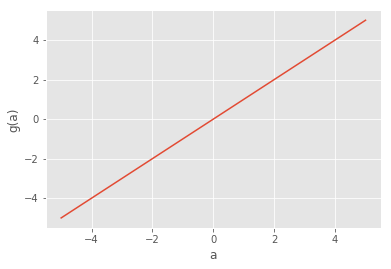

In [2]:
plt.plot(x, x)
plt.xlabel("a")
plt.ylabel("g(a)")
plt.show()

## Binary classification

$y$ is either $0$ or $1$

$\rightarrow$ $g(a)$ is the sigmoid or inverse logit function

$$g(a) = \dfrac{1}{1 + \exp(-a)}$$


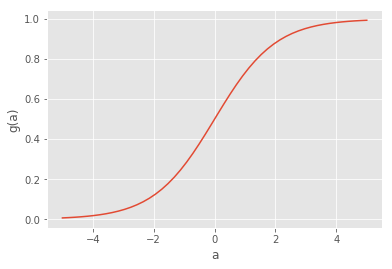

In [3]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))


plt.plot(x, sigmoid(x))
plt.xlabel("a")
plt.ylabel("g(a)")
plt.show()

## Multi-class classification

$y$ is a member of the set $[0, 1, ..., K]$

$\rightarrow$ $g(a)$ is the softmax function

- returns probability of each class
- guarantees that these probabilities sum to one

$$g(a_k) = \dfrac{\exp(a_k)}{\sum_{j} \exp(a_j)}$$


In [4]:
def softmax(a):
    denom = np.sum(np.exp(a))
    return np.exp(a) / denom

a = [-1, 2, 3, 0]
probs = softmax(a)

print("Activations: {}".format(a))
print("Probabilities: {}".format(probs))
print("Sum of probabilities: {}".format(np.sum(probs)))

Activations: [-1, 2, 3, 0]
Probabilities: [ 0.01275478  0.25618664  0.69638749  0.03467109]
Sum of probabilities: 1.0


# Review

1. Start with inputs $x_1, ..., x_D$
1. Compute activations of hidden layer $a_1, ..., a_M$
1. Apply non-linear activation function to compute $z_1, ..., z_M$
1. Use hidden layer to compute network outputs $y_1, ..., y_K$


### This is forward propagation

# How to choose good values for weights?

![](fig/bishop-5-1.png)

# Training your neural network

We have **target data** (our observed responses, class labels, etc.):

$$\pmb t = \{t_1, ..., t_N\}$$

And we want to maximize the probability of the data, given the parameters

$$p(t_1, t_2, ..., t_N \mid w)$$

- this is the **likelihood function**

# Assumptions

### Independence

Observations $i = 1, ..., N$ are conditionally independent such that 

$$p(t_1, t_2, ..., t_N \mid w) = \prod_{n = 1}^N p(t_n \mid w)$$

### Choosing $p(t_n \mid w)$

- Unbounded real-valued targets: **Normal** (Gaussian) likelihood
- Binary classification: **Binomial** likelihood
- Multi-class classification: **Multinomial** likelihood


# Network training: minimizing an error fuction

We start by choosing a **likelihood** to *maximize*.

But we typically *minimize* the negative log likelihood **error function**, or something proportional to it.

e.g., for a Normal distribution we minimize the **mean squared error** function

$$\text{Error}(w) = \frac{1}{2} \sum_{n = 1}^N (y_n - t_n)^2$$

# Error functions are non-convex and high-dimensional

![](https://qph.ec.quoracdn.net/main-qimg-abfbe698dd41306dc2691e8d0c3182a0)

# Gradient based optimization

Start by randomly initializing weight values

Iteratively,

1. Forward propagate the model to make predictions
1. Compute the error function $E(w)$
1. **Change the weight values to reduce $E(w)$**

# How to update weights?

## Gradient descent at step $\tau$

$w^{(\tau + 1)} = w^{(\tau)} - \eta \nabla_w E(w^{(\tau)})$

where 

$\eta$: a "learning rate" or step-size parameter

$\nabla_w E(w^{(\tau)})$: gradient of the error function $\big( \frac{\partial E}{\partial w_1}, \frac{\partial E}{\partial w_2}, \frac{\partial E}{\partial w_3}, ... \big)$*


\* *To see how to compute these gradients, see section 5.3 in Bishop (2011)*

# Flavors of gradient descent

### Stochastic

Weights updated **one data point at a time**

### Mini-batch

Weights updated for **small batches of data points**

### Batch

Weights updated based on gradient of **all the data simultaneously**

![](https://i.stack.imgur.com/lU3sx.png)

# General advice

For large datasets, **use minibatches**!

- less memory required
- faster network training
- better chance of escaping a local minimum

# Fancy gradient descent

### Extensions:

- momentum
- tunable parameter-specific learning rates

![](https://i.imgur.com/NKsFHJb.gif)

# Review: training your network

Randomly initialize weights

Iteratively,

1. Forward propagate
1. Compute $E(w)$
1. Update weights to reduce $E(w)$

# Implementations

### Today: 

![](http://www.scipy-lectures.org/_images/scikit-learn-logo.png)


# Some more advanced ML frameworks

### Tensorflow

- Graph-based
- Very common
- Not very Pythonic


### Pytorch

- Very pythonic
- Flexible
- Great for ML research



### Keras

- Higher level of abstraction
- Multiple backends (Tensorflow, CNTK, Theano)



# Rest of class

### 1. In-class lab

https://github.com/mbjoseph/intro-neural-nets-sklearn

Jupyter notebook: `nn-lab.ipynb`



### 2. Neural network playground

http://playground.tensorflow.org/

Build some intuition! 

#### Things to change:

- \# of hidden layers
- \# of neurons in hidden layers
- datasets
- learning rate
- batch size
